# Building Model to find the Churn using Laaso and Discion Tree

In [22]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Reading the csv file and putting it into 'df' object.
churn_data = pd.read_csv('churn_data_cleaned.csv')

In [24]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to days_forrech_before_month_end_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [25]:
churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_7_2.0,fb_8_1.0,fb_8_2.0,total_data_amt_6,total_data_amt_7,total_data_amt_8,churn,days_forrech_before_month_end_6,days_forrech_before_month_end_7,days_forrech_before_month_end_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,1,0,1,0.0,0.0,0.0,1,3.0,34.0,65.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,1,0,0.0,354.0,207.0,0,5.0,36.0,67.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,1,0,1,0.0,0.0,0.0,0,0.0,31.0,62.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,1,0,0.0,712.0,540.0,0,12.0,43.0,74.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,0,1,0,5285.0,20424.0,455.0,0,0.0,31.0,62.0


## Model Building

1. We will use lasso regression for feature reduction

2. We will use Smote and Tomek links to handle data imbalance

3. We will use the Decision Tree to build the model

In [26]:
## Splitting the data into train and test
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X = churn_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = churn_data['churn']

In [28]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)


In [29]:
# combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_train_balance, y_train_balance = smt.fit_sample(X_train,y_train)

In [30]:
##Starting the Feature reduction using Lasso regression and using sklearns selectfrommodel library
from sklearn.svm import LinearSVC
#from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
 
linear_svc = LinearSVC(C=0.0001,penalty="l1", dual=False)
linear_svc_model = SelectFromModel(linear_svc)
linear_svc_model.fit(X_train_balance,y_train_balance)
X_train_lasso = linear_svc_model.transform(X_train_balance)
col_list = linear_svc_model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_train_lasso.shape)

(37678, 68)


In [31]:
columns_after_lasso = list(X.columns[col_list])
columns_after_lasso

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_a

In [32]:
X_train_fetaure_reduced= X_train_lasso
Y_train_fetaure_reduced= y_train_balance

In [33]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test = pd.DataFrame(data=X_test).iloc[:, col_list]
# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8055
           1       0.24      0.69      0.36       497

   micro avg       0.86      0.86      0.86      8552
   macro avg       0.61      0.78      0.64      8552
weighted avg       0.94      0.86      0.89      8552



In [35]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6972 1083]
 [ 152  345]]
0.8555893358278766


## Finding the optimal hyper parameters

In [36]:
##Tuning for optimal maxdepth
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [37]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.372607,0.072573,0.004191,0.001934,1,{'max_depth': 1},0.786093,0.809448,0.809581,0.816879,...,0.808615,0.012103,39,0.816071,0.810232,0.810165,0.807810,0.806761,0.810208,0.003225
1,0.558907,0.077403,0.004387,0.001850,2,{'max_depth': 2},0.814092,0.832404,0.828025,0.831874,...,0.828149,0.007322,38,0.831398,0.826787,0.827915,0.828147,0.828755,0.828600,0.001537
2,0.783307,0.068664,0.004396,0.001734,3,{'max_depth': 3},0.833599,0.855228,0.849920,0.853105,...,0.849461,0.008177,37,0.857441,0.852067,0.853726,0.847555,0.848859,0.851930,0.003527
3,1.253849,0.193087,0.005187,0.002129,4,{'max_depth': 4},0.837580,0.862659,0.859607,0.859740,...,0.855327,0.009050,36,0.868987,0.863446,0.863480,0.856081,0.855460,0.861491,0.005091
4,1.800988,0.278999,0.005784,0.003180,5,{'max_depth': 5},0.845807,0.872479,0.868498,0.869559,...,0.865333,0.009850,35,0.881362,0.874461,0.873001,0.870015,0.869825,0.873733,0.004204


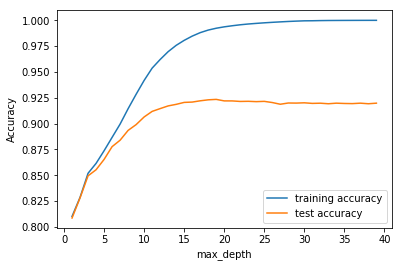

In [38]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We see that the test accuracy flattens from 15, so we will take 5-15 range for max depth

In [39]:
### Tuning min_samples_leaf
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.945652,0.398043,0.004588,0.000488,5,{'min_samples_leaf': 5},0.872479,0.922903,0.926486,0.924496,...,0.912840,0.020384,1,0.972099,0.970473,0.972032,0.968682,0.969181,0.970493,0.001411
1,3.658620,0.385182,0.005586,0.001738,25,{'min_samples_leaf': 25},0.861996,0.912553,0.910563,0.907245,...,0.899411,0.018902,2,0.929534,0.923695,0.923031,0.922666,0.923401,0.924465,0.002558
2,3.409484,0.465141,0.005785,0.001934,45,{'min_samples_leaf': 45},0.863057,0.895966,0.902601,0.900478,...,0.892669,0.014973,3,0.914770,0.909097,0.910656,0.906410,0.909136,0.910014,0.002744
3,2.486221,0.252656,0.004988,0.001262,65,{'min_samples_leaf': 65},0.859209,0.898222,0.893312,0.895303,...,0.887680,0.014377,4,0.907206,0.899443,0.900073,0.896789,0.898753,0.900453,0.003552
4,2.382915,0.121157,0.004588,0.000489,85,{'min_samples_leaf': 85},0.853105,0.890658,0.887473,0.887872,...,0.882159,0.014616,5,0.900770,0.894433,0.895262,0.889822,0.893810,0.894819,0.003514


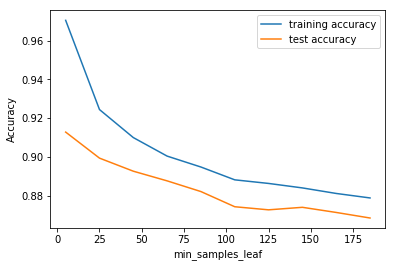

In [41]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We see that the accuracy is going down from 75, we will take the range of 25-75

In [42]:
### Tuning min_samples_split
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.344538,0.432651,0.004788,0.000747,5,{'min_samples_split': 5},0.884289,0.920249,0.925425,0.927282,...,0.916264,0.016154,1,0.995621,0.994824,0.995156,0.994957,0.995090,0.995130,0.000271
1,4.827863,0.459022,0.005386,0.001017,25,{'min_samples_split': 25},0.873540,0.920117,0.921311,0.919321,...,0.909735,0.018251,2,0.970241,0.968051,0.967487,0.966525,0.966561,0.967773,0.001362
2,5.235895,0.869101,0.005388,0.001352,45,{'min_samples_split': 45},0.865313,0.914676,0.917065,0.910297,...,0.903339,0.019222,3,0.957368,0.952127,0.952624,0.949472,0.950571,0.952432,0.002710
3,4.434147,0.905824,0.006191,0.001162,65,{'min_samples_split': 65},0.862659,0.911890,0.913482,0.909899,...,0.900844,0.019243,4,0.951364,0.945259,0.942705,0.939155,0.939192,0.943535,0.004539
4,4.593122,0.361237,0.004587,0.000488,85,{'min_samples_split': 85},0.858546,0.907643,0.909236,0.907113,...,0.897579,0.019557,5,0.943965,0.936700,0.936069,0.931955,0.930567,0.935851,0.004684


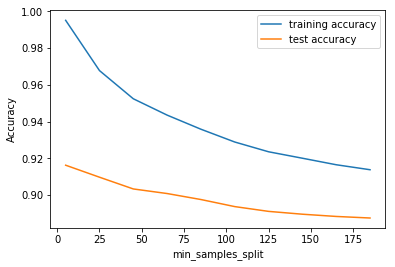

In [44]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We see that the accuracy is going down from 75, we will take the range of 25-75

### Using Grid search CV to find optimal hyperparameters

Now that we have got the range of values lets use grid serach cv to get the optimal vales

In [45]:
# Create the parameter grid 
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 75, 25),
    'min_samples_split': range(25, 75, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_fetaure_reduced,Y_train_fetaure_reduced)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 75, 25), 'min_samples_split': range(25, 75, 25), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [46]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.213284,0.335473,0.003990,0.000632,entropy,5,25,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.842622,...,0.861776,0.009986,13,0.875290,0.866134,0.866499,0.864077,0.859773,0.866354,0.005068
1,1.875387,0.148422,0.004189,0.000978,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.842622,...,0.861776,0.009986,13,0.875290,0.866134,0.866499,0.864077,0.859773,0.866354,0.005068
2,1.842674,0.051855,0.004596,0.001851,entropy,5,50,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.840764,...,0.860980,0.010676,15,0.873831,0.865138,0.865404,0.864044,0.859640,0.865611,0.004603
3,1.772063,0.017140,0.003392,0.000488,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.840764,...,0.860980,0.010676,15,0.873831,0.865138,0.865404,0.864044,0.859640,0.865611,0.004603
4,3.013346,0.086909,0.003791,0.000400,entropy,10,25,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856157,...,0.891555,0.017771,4,0.920510,0.919183,0.916694,0.911253,0.912288,0.915986,0.003668
5,3.099911,0.093845,0.004590,0.000796,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.856423,...,0.891581,0.017684,3,0.920510,0.919050,0.916761,0.911253,0.912255,0.915966,0.003654
6,3.082161,0.148844,0.004389,0.000797,entropy,10,50,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.857351,...,0.889405,0.016162,5,0.908102,0.906177,0.906542,0.900770,0.903098,0.904938,0.002641
7,2.948320,0.077411,0.004388,0.000798,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.857351,...,0.889405,0.016162,5,0.908102,0.906177,0.906542,0.900770,0.903098,0.904938,0.002641
8,1.215151,0.010280,0.003591,0.000488,gini,5,25,25,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.844878,...,0.864696,0.010004,9,0.880897,0.873831,0.871475,0.869285,0.869294,0.872956,0.004311
9,1.237892,0.009107,0.003192,0.000398,gini,5,25,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.844878,...,0.864696,0.010004,9,0.880897,0.873831,0.871475,0.869285,0.869294,0.872956,0.004311


In [47]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8935983863262381
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


**Running the model with best parameters obtained from grid search.**

In [51]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_train_fetaure_reduced, Y_train_fetaure_reduced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [52]:
# accuracy score
print("Trainign Accuracy:")
print(clf_gini.score(X_train_fetaure_reduced,Y_train_fetaure_reduced))
print("Test Accuracy:")
print(clf_gini.score(X_test,y_test))


Trainign Accuracy:
0.9173788417644249
Test Accuracy:
0.8824836295603368


In [53]:
# Printing confusion matrix and accuracy
y_pred_final = clf_gini.predict(X_test)
print(confusion_matrix(y_test,y_pred_final))

[[7258  797]
 [ 208  289]]


### Colclusion

Lasso helped us to reduce the number of features to 68

With hyper parameter tuning for Decision Tree we got the train accuracy of 91% and test accuracy of 88%

Let u try the random forest next to see how it performs.